<a href="https://colab.research.google.com/github/marcosilvaa/data_projects/blob/main/An%C3%A1lise_T%C3%A9cnica_Bitcoin_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bitcoin, O Ouro Digital

In [ ]:
# instalando bibliotecas
! pip install ta
! pip install investpy
! pip install plotly
! pip install git+https://github.com/alvarobartt/investpy.git@master

In [81]:
# importando bibliotecas
import ta
import investpy as ipy
import pandas as pd
import  plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import time


sns.set(style='darkgrid')

In [82]:
# criando variável para data de hoje
data_atual = date.today()

# convertendo data para formato String
data_atual = data_atual.strftime("%d/%m/%Y")

data_atual

'12/07/2022'

In [83]:
btc = ipy.get_crypto_historical_data(crypto='Bitcoin', from_date='18/07/2010', to_date=data_atual)

In [84]:
btc.tail()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-07-08,21637.1,22482.1,21207.0,21611.2,439902,USD
2022-07-09,21610.4,21944.1,21338.4,21587.5,190109,USD
2022-07-10,21587.4,21599.2,20689.7,20847.4,204676,USD
2022-07-11,20847.2,20855.0,19897.0,19963.2,160196,USD
2022-07-12,19963.2,20051.7,19296.5,19421.2,172555,USD


In [85]:
# removendo coluna `Currency`
btc.drop("Currency", axis=1, inplace=True)

In [86]:
# criando variavel para as colunas do DataFrame
btcOpen = btc['Open']
btcHigh = btc['High']
btcLow = btc['Low']
btcClose = btc['Close']
btcVolume = btc['Volume']

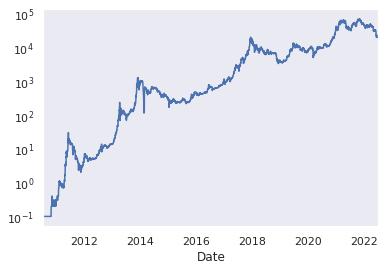

In [87]:
# plotando gráfico de linha em escala logarítmica 
btcClose.plot(logy=True, grid=False);

In [88]:
# plotando gráfico de CandleSticks
# criando figura
fig = go.Figure()

# criando gráfico
fig.add_trace(
    go.Candlestick(x=btc.index,
                open=btc['Open'],
                high=btc['High'],
                low=btc['Low'],
                close=btc['Close']))


# configurando botoes de seleção de período de tempo
fig.update_layout(
    xaxis=dict(
        rangeselector = dict(
            buttons = ([
                        #1 mes
                        dict(count = 1,
                             label = '1m',
                             step = 'month',
                             stepmode = 'backward'),
                        #3 meses
                        dict(count = 3,
                             label = '3m',
                             step = 'month',
                             stepmode = 'backward'),
                        # 6 meses
                        dict(count = 6,
                             label = '6m',
                             step = 'month',
                             stepmode = 'backward'),
                        # 1 ano
                        dict(count = 1,
                             label = '1y',
                             step = 'year',
                             stepmode = 'backward'),
                        # ultimos 12 meses
                        dict(count = 1,
                             label = 'YTD',
                             step = 'year',
                             stepmode = 'todate'),
                        # total
                        dict(step='all')
            ])
        ),
        # configurando slider
        rangeslider = dict( visible = False),
        
        type='date'
    )
)

# configurando escala logarítimica 
fig.update_yaxes(type="log")

# configurando tamanho do gráfico 
fig.update_layout(
    autosize=True)

# plotando figura
fig.show()

# Indicadores e Osciladores

Um indicador é uma série de dados que são derivados pela aplicação de uma fórmula nos dados dos preços de um ativo, podendo combinar fatores como *Máxima, Mínima, Abertura, Fechamento, Volume,* em um determinado período de tempo. Toda essa combinação de dados nos gera um ponto de dados, porém é necessário uma série de pontos de dados ao longo de um período de tempo para que possamos criar pontos de referência para nossa análise. Com a criação de uma série temporal de diferentes pontos de dados, podemos comparar os resultados atuais com os obtidos no passado. 

Um indicador técnico trás uma nova perspectiva para a análise do preço do ativo. Alguns são de símples criação e interpretação, ***Médias Móveis*** é um exemplo de indicador simples, sendo de fácil criação e interpretação. Já os indicadores como ***MACD (Moving Average Convergence and Divergence)***, apresenta uma fórmula matemática mais complexa, e exigem um maior conhecimento para que possa ser interpretado. 
***
## Por que utilizar Indicadores?


1.   Confirmação de padrões gráficos e/ou outras ferramentas de análise.
2.   Prever com base matemática a possível direção do preço futuro do ativo.
3.   Nos alertar para prestarmos atenção à possíveis movimentos do preço. 
***
## O que é um Oscilador? 

São indicadores que variam entre uma linha média, podendo variar dentro de um *range* de 0 a 100%. Quando se encontram nos níveis extremos informam que o preço encontra-se *Sobrecomprado* ou *Sobrevendido*. 
***
## Sinais de Compra e Venda

De 3 formas distintas um indicador e oscilador indicam sinais de compra e venda:

1. Cruzamento de linhas com médias móveis ou com a linha média.
2. Divergências, quando o indicador nos mostra uma tendência de alta e o preço se encontra em tendência de baixa, ou vice-versa. 
3. Extremos, mostrando que o preço se encontra sobrecomprado ou sobrevendido. 







# Indicadores Seguidores de Tendência

Funcionam melhores quando o ativo encontra-se em uma tendência forte, pois seguem o preço do ativo e podem ser considerados *atrasados*. Após uma tendência já consolidada, nos indicam pontos de entrada e podem indicar para nos mantermos dentro da operação enquanto a tendência for válida. Quanto mais longa a tendência, menos sinais serão informados. 

Esse tipo de indicador não é recomendado para momentos de acumulação e distribuição lateral. E são também conhecidos como indicadores atrasados pois quando informam um sinal de entrada ou saída, já ocorreu parte do movimento, podendo diminuir a quantidade de lucro da operação.  

*** 
## Quais são os Indicadores Seguidores de Tendência:
*   SMA - Simple Moving Average
*   EMA - Exponential Moving Average
*   WMA - Weighted Moving Average
*   MACD - Moving Average Convergence Divergence
*   ADX - Average Directional Movement Index
*   AI - Aroon Indicator
*   CCI - Commodity Channel Index
*   DPO - Detrended Price Oscillator
*   Ichimoku - Ichimoku Kinkō Hyō 
*   KST - KST Oscillator
*   MI - Mass Index
*   Parabolic SAR - Parabolic Stop and Reverse
*   STC - Schaff Trend Cycle
*   TRIX - Trix
*   VI - Vortex Indicator
*   ADX - Average Directional Movement Index



In [89]:
# configurando Média Móvel Simples
from ta.trend import SMAIndicator

sma_short = SMAIndicator(btc['Close'], window=21)
sma_long = SMAIndicator(btc['Close'], window=50)
btc['SMA_SHORT'] = sma_short.sma_indicator()
btc['SMA_LONG'] = sma_long.sma_indicator()

fig.add_trace(go.Scatter(name='SMA_SHORT', x=btc.index, y=btc['SMA_SHORT']))
fig.add_trace(go.Scatter(name='SMA_LONG', x=btc.index, y=btc['SMA_LONG']))
#fig.update_layout(xaxis_rangeslider_visible=False, title_text='Simple Moving Average')

In [90]:
# Configurando Média Exponêncial 
from ta.trend import EMAIndicator

ema_short = EMAIndicator(btcClose, window = 21)
ema_long = EMAIndicator(btcClose, window = 50)

btc['EMA_SHORT'] = ema_short.ema_indicator()
btc['EMA_LONG'] = ema_long.ema_indicator()

## Configurando Indicadores de *Momentum*

Também conhecido como *Indicadores Antecedentes*, são projetados para liderar os movimentos de preços. 




In [91]:
# Configurando Indicador - PPO
from ta.momentum import PercentagePriceOscillator

ppo = PercentagePriceOscillator(btcClose)
btc['PPO'] = ppo.ppo()
btc['PPO_hist'] = ppo.ppo_hist()
btc['PPO_line'] = ppo.ppo_signal()

In [92]:
# Configurando Indicador - RSI
from ta.momentum import RSIIndicator

rsi = RSIIndicator(close=btcClose, window=30)
btc['RSI'] = rsi.rsi

In [93]:
# Configurando Indicador - VWAP
from ta.volume import VolumeWeightedAveragePrice

vwap = VolumeWeightedAveragePrice(btc['High'], btc["Low"], btc["Close"], btc["Volume"])
btc['VWAP'] = vwap.volume_weighted_average_price()

In [94]:
# Configurando Indicador - Bollinger Bands
from ta.volatility import BollingerBands

bb = BollingerBands(close=btcClose, window=20, window_dev=2)
btc['bb_bbm'] = bb.bollinger_mavg()
btc['bb_bbh'] = bb.bollinger_hband()
btc['bb_bbl'] = bb.bollinger_lband()

In [95]:
# Configurando Indicador - Keltner
from ta.volatility import KeltnerChannel
keltner = KeltnerChannel(btcHigh, btcLow, btcClose) 
btc['KELTNER_HB'] = keltner.keltner_channel_hband()
btc['KELTNER_LB'] = keltner.keltner_channel_lband()
btc['KELTNER_M'] = keltner.keltner_channel_mband()

In [96]:
# Configurando Indicador - 


In [97]:
btc.head()

,Open,High,Low,Close,Volume,SMA_SHORT,SMA_LONG,EMA_SHORT,EMA_LONG,PPO,PPO_hist,PPO_line,RSI,VWAP,bb_bbm,bb_bbh,bb_bbl,KELTNER_HB,KELTNER_LB,KELTNER_M
Date,,,,,,,,,,,,,,,,,,,,
2010-07-18,0.0,0.1,0.1,0.1,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<bound method RSIIndicator.rsi of <ta.momentum...,NaN,NaN,NaN,NaN,0.1,0.1,NaN
2010-07-19,0.1,0.1,0.1,0.1,574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<bound method RSIIndicator.rsi of <ta.momentum...,NaN,NaN,NaN,NaN,0.1,0.1,NaN
2010-07-20,0.1,0.1,0.1,0.1,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<bound method RSIIndicator.rsi of <ta.momentum...,NaN,NaN,NaN,NaN,0.1,0.1,NaN
2010-07-21,0.1,0.1,0.1,0.1,575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<bound method RSIIndicator.rsi of <ta.momentum...,NaN,NaN,NaN,NaN,0.1,0.1,NaN
2010-07-22,0.1,0.1,0.1,0.1,2160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<bound method RSIIndicator.rsi of <ta.momentum...,NaN,NaN,NaN,NaN,0.1,0.1,NaN
